In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

In [2]:
euro_c_df_clean = pd.read_csv('euro_c_df_clean.csv')

In [3]:
# date -> days since
date = euro_c_df_clean['acq_date']
x_datetime = pd.to_datetime(date)
reference_date = pd.Timestamp(date.min())       # earliest date, '2020-03-01'
x_timedelta = x_datetime - reference_date
# number of days between data collection and reference date
x_days = x_timedelta.dt.days

# scale data
x_days = (x_days - x_days.mean())/x_days.std()
time = euro_c_df_clean['acq_time']
time = (time - time.mean())/time.std()
frp=euro_c_df_clean['frp']
frp = (frp - frp.mean())/frp.std()

x = (x_days+time).to_numpy()   # x: acq_date + acq_time
y = frp.to_numpy()      # y: frp

In [4]:
# TESTING with polynomial -- not as good
# # create original polynomial values
# poly = PolynomialFeatures(2).fit_transform(x.reshape(-1, 1))

# # update values and add to X_poly
# X_poly = []
# for p in poly:
#     p = p[1:]
#     X_poly.append(p)
# X_poly = np.array(X_poly)

# # add bias column for intercept
# X2 = np.hstack([np.ones((X_poly.shape[0], 1)), X_poly])

X2 = np.hstack([np.ones((x.shape[0], 1)), x.reshape(-1, 1)])
X2

array([[ 1.        , -0.31002742],
       [ 1.        , -0.31002742],
       [ 1.        , -0.31002742],
       ...,
       [ 1.        ,  0.54604609],
       [ 1.        ,  2.10829071],
       [ 1.        ,  1.01231511]])

In [5]:
# use np math to find m
m = np.matmul(np.linalg.inv(np.matmul(X2.T, X2)), np.matmul(X2.T, y))
print('m: ', m)

# calculate predicted y's, residuals, squared residuals, and mse
ypreds = np.matmul(X2, m)
resids = y - ypreds
new_r = []
for r in resids:
    new_r.append(r**2)
mse = sum(new_r) / len(new_r)
print('mse: ', mse)

# identify outlying residuals -- predicted y value was far off
problem_ys = []
for num in y:
    if num - ypreds[list(y).index(num)] > 8:
        problem_ys.append([num, ypreds[list(y).index(num)]])
print('problem y values: ', problem_ys)

m:  [-1.65148919e-16  1.24560663e-01]
mse:  0.9716809442882597


problem y values:  [[9.608539170281018, 0.21717330596625103], [9.608539170281018, 0.21717330596625103], [21.728709125950953, 0.21717330596625103], [16.885951912388737, 0.21717330596625103], [9.132229601983433, 0.005796458278658034]]


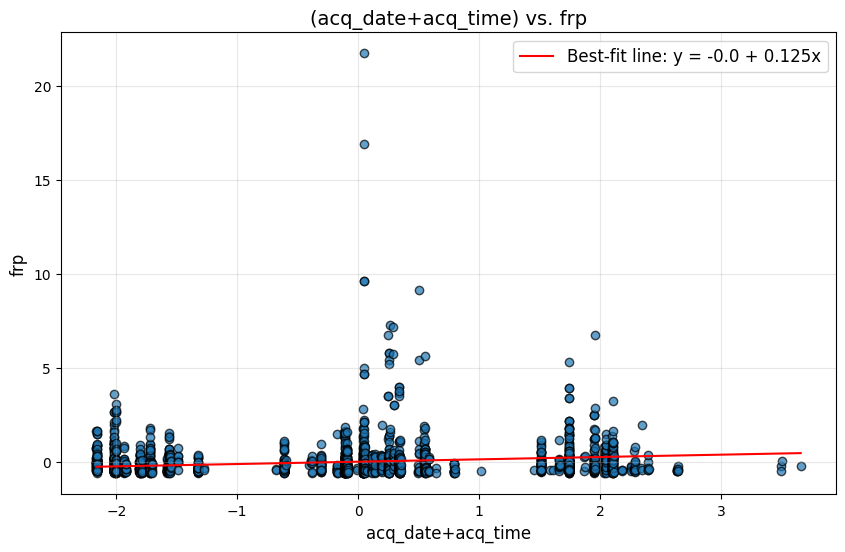

In [7]:
x_plot = np.sort(x)

# scatterplot of frp vs acq_date with best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(x=x_plot, y=y, alpha=0.7, edgecolor='k')
plt.plot(x_plot, m[0] + m[1]*x_plot, color='red',
    label=f'Best-fit line: y = {round(m[0], 3)} + {round(m[1], 3)}x') # Best-fit line
plt.title('(acq_date+acq_time) vs. frp', fontsize=14)
plt.xlabel('acq_date+acq_time', fontsize=12)
plt.ylabel('frp', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

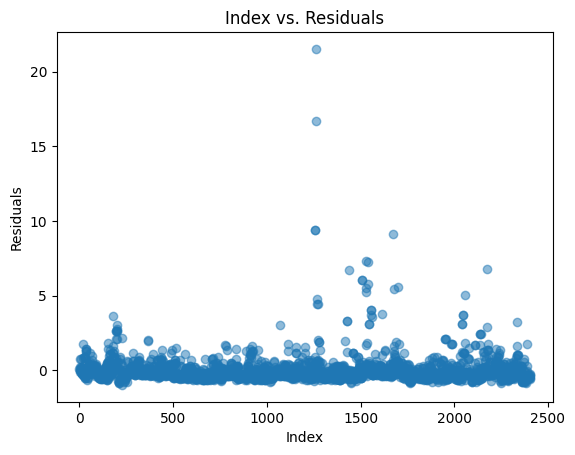

In [ ]:
# index vs. residuals
plt.scatter(range(len(x)), resids, alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Index vs. Residuals')
plt.show()

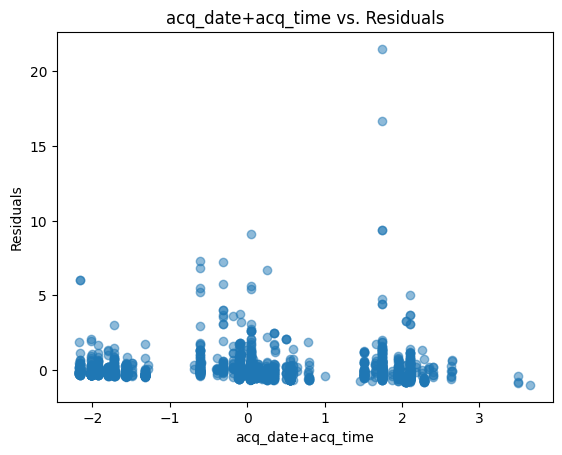

In [ ]:
# acq_date+acq_time vs. residuals
plt.scatter(x, resids, alpha=0.5)
plt.xlabel('acq_date+acq_time')
plt.ylabel('Residuals')
plt.title('acq_date+acq_time vs. Residuals')
plt.show()

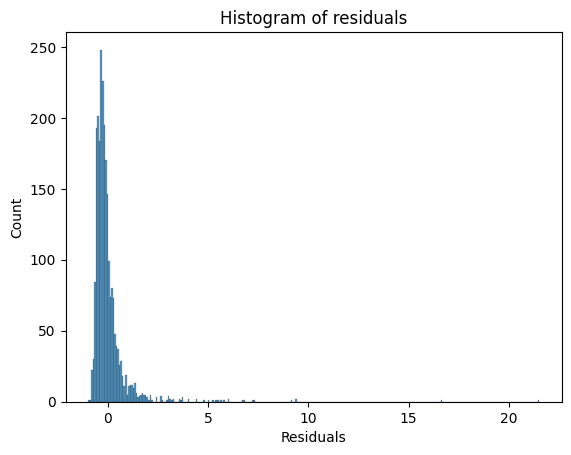

In [ ]:
# histogram of residuals
sns.histplot(resids, kde=False)
plt.xlabel('Residuals')
plt.title('Histogram of residuals')
plt.show()

In [8]:
# ORIGINAL LINEAR REGRESSION: acq_date vs. frq

# acq_date as the feature variable doesn't produce a good linear model

x_df = euro_c_df_clean['acq_date']
x_datetime = pd.to_datetime(x_df)
reference_date = pd.Timestamp(x_df.min())                       # earliest date, '2020-03-01'
x_timedelta = x_datetime - reference_date

# number of days between data collection and reference date
x_days = x_timedelta.dt.days

# scale data
x_days = (x_days - x_days.mean())/x_days.std()
frp=euro_c_df_clean['frp']
frp = (frp - frp.mean())/frp.std()

x = x_days.to_numpy()                                           # x: days since 2020-03-01
X = np.hstack([np.ones((x.shape[0], 1)), x.reshape(-1, 1)])     # X has a bias (1's) column
y = frp.to_numpy()                           # y: frp

# solves (X^T X) m = (X^T y) for m
m = np.linalg.solve(np.matmul(X.T, X), np.matmul(X.T, y))

# calculate predicted y's, residuals, squared residuals, and mse
ypreds = np.matmul(X, m)
resids = y - ypreds
new_r = []
for r in resids:
    new_r.append(r**2)
mse = sum(new_r) / len(new_r)
print('mse: ', mse)

mse:  0.9983112178658664


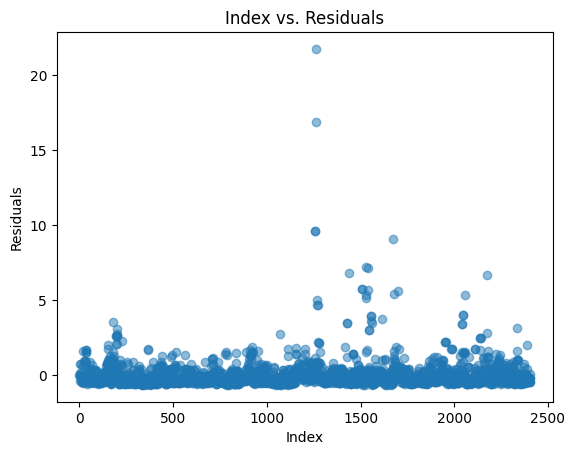

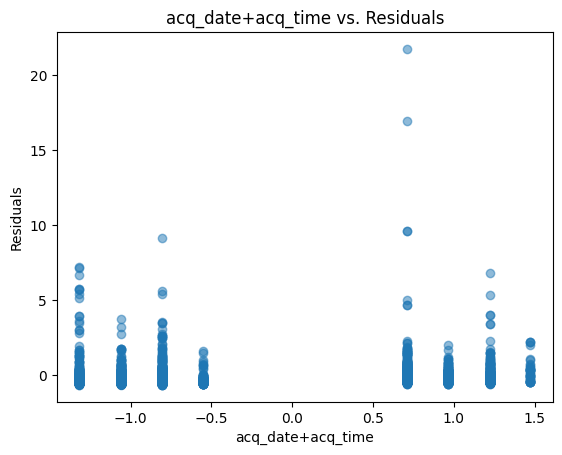

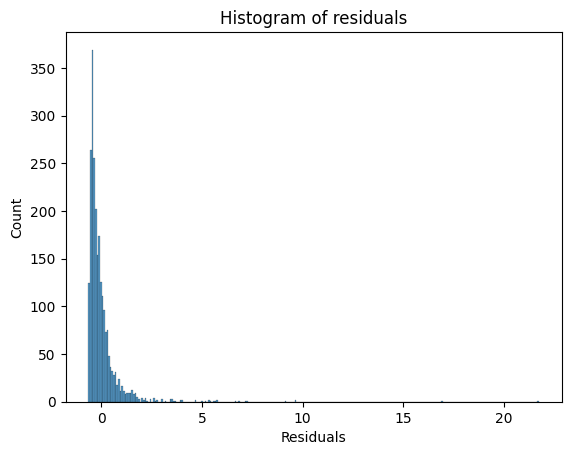

In [9]:
# index vs. residuals
plt.scatter(range(len(x)), resids, alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.title('Index vs. Residuals')
plt.show()

# acq_date+acq_time vs. residuals
plt.scatter(x, resids, alpha=0.5)
plt.xlabel('acq_date')
plt.ylabel('Residuals')
plt.title('acq_date vs. Residuals')
plt.show()

# histogram of residuals
sns.histplot(resids, kde=False)
plt.xlabel('Residuals')
plt.title('Histogram of residuals')
plt.show()